In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [27]:
# Load MNIST dataset
(mnist_trainX, mnist_trainY), (mnist_testX, mnist_testY) = mnist.load_data()

# Load custom dataset
data = np.load('mnist_custom.npz')
custom_trainX = data['trainX']
custom_trainY = data['trainY']
custom_testX = data['testX']
custom_testY = data['testY']

# Print shapes for debugging
print(f"MNIST trainX shape: {mnist_trainX.shape}, trainY shape: {mnist_trainY.shape}")
print(f"Custom trainX shape: {custom_trainX.shape}, trainY shape: {custom_trainY.shape}")

# Preprocess MNIST: Normalize to [0,1] and ensure float32
mnist_trainX = mnist_trainX.astype('float32') / 255.0
mnist_testX = mnist_testX.astype('float32') / 255.0

custom_trainX = custom_trainX.astype('float32') / 255.0
custom_testX = custom_testX.astype('float32') / 255.0
    
# Convert labels to one-hot encoding (for 10 classes: digits 0-9)
mnist_trainY = to_categorical(mnist_trainY, 10)
mnist_testY = to_categorical(mnist_testY, 10)
custom_trainY = to_categorical(custom_trainY, 10)
custom_testY = to_categorical(custom_testY, 10)

# Combine training sets
combined_trainX = np.concatenate([mnist_trainX, custom_trainX], axis=0)
combined_trainY = np.concatenate([mnist_trainY, custom_trainY], axis=0)

combined_trainX, combined_trainY = shuffle(combined_trainX, combined_trainY, random_state=42)



MNIST trainX shape: (60000, 28, 28), trainY shape: (60000,)
Custom trainX shape: (2574, 28, 28), trainY shape: (2574,)


In [28]:
inputs = Input((28, 28))
x = Flatten()(inputs) #--- 2d vector(image) input have to be flatten
x = Dense(1024, activation = 'relu')(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Train the model
history = model.fit(
    combined_trainX, combined_trainY, 
    validation_split=0.2, 
    epochs=15, 
    batch_size=32
)

Epoch 1/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.9178 - loss: 0.2659 - val_accuracy: 0.9413 - val_loss: 0.1908
Epoch 2/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9611 - loss: 0.1290 - val_accuracy: 0.9493 - val_loss: 0.1688
Epoch 3/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9714 - loss: 0.0942 - val_accuracy: 0.9575 - val_loss: 0.1463
Epoch 4/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9758 - loss: 0.0762 - val_accuracy: 0.9624 - val_loss: 0.1354
Epoch 5/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9806 - loss: 0.0603 - val_accuracy: 0.9646 - val_loss: 0.1330
Epoch 6/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9833 - loss: 0.0546 - val_accuracy: 0.9639 - val_loss: 0.1345
Epoch 7/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9854 - loss: 0.0453 - val_accuracy: 0.9620 - val_loss: 0.1527
Epoch 8/15
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9873 -

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy on custom test set: 0.7484


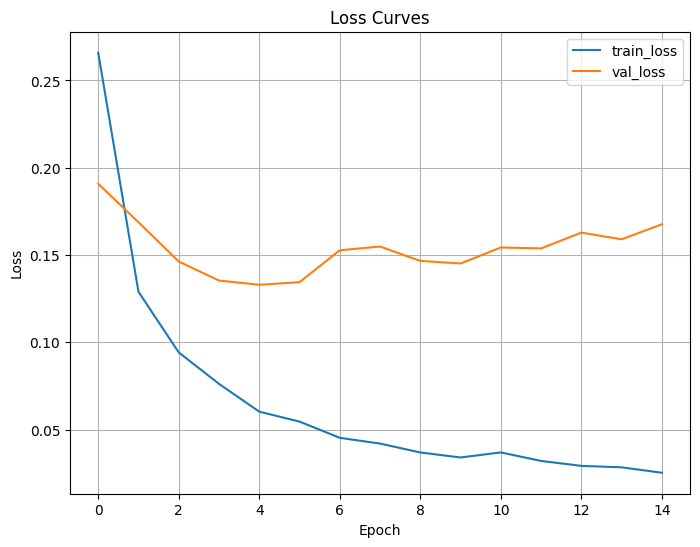

In [30]:
# Predict on test set
y_pred = model.predict(custom_testX)

testY_labels = np.argmax(custom_testY, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
acc = accuracy_score(testY_labels, y_pred_labels)
print(f"Accuracy on custom test set: {acc:.4f}")
   
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
    

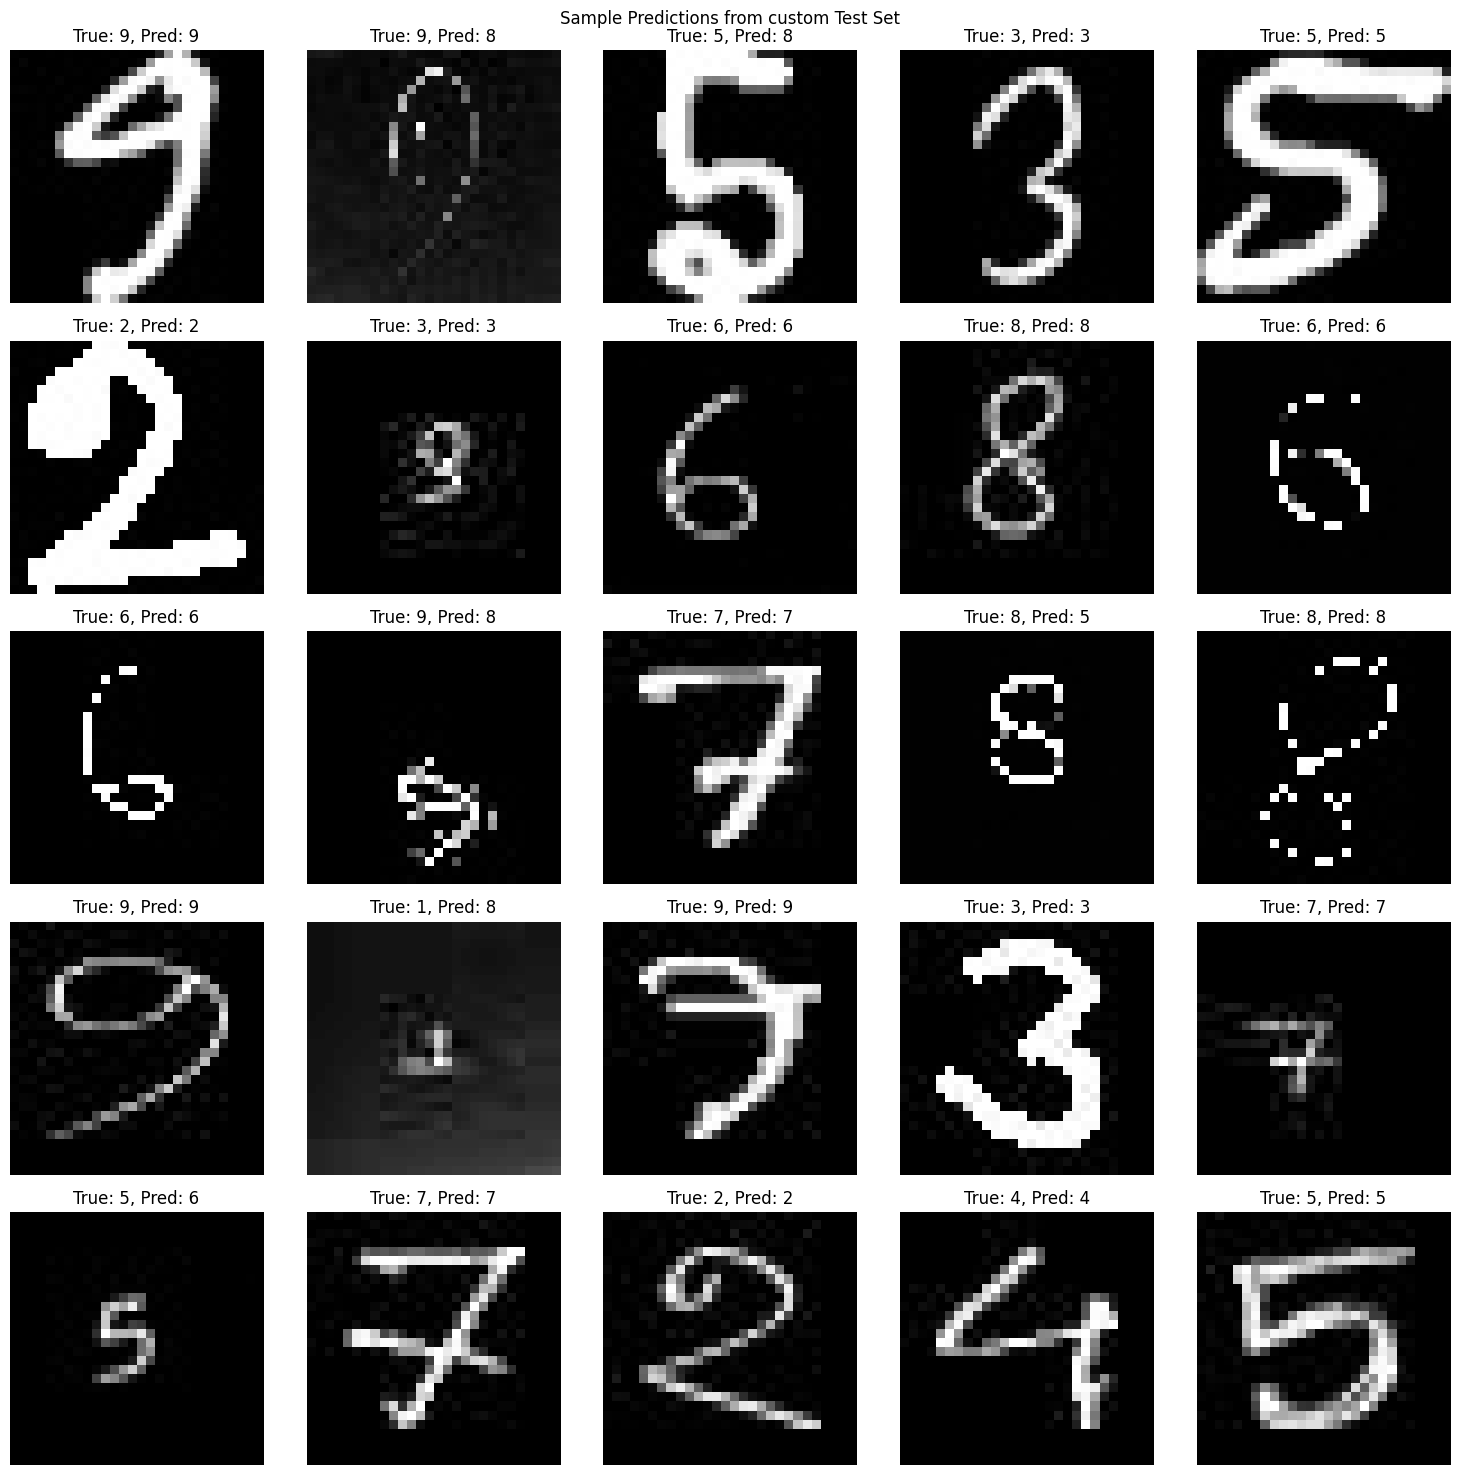

In [31]:
# Plot sample predictions
plt.figure(figsize=(15, 15))
num_samples, rows, cols = 25, 5, 5
for i in range(min(num_samples, len(custom_testX))):
    plt.subplot(rows, cols, i+1)
    plt.axis('off')
    plt.imshow(custom_testX[i], cmap="gray")
    plt.title(f'True: {testY_labels[i]}, Pred: {y_pred_labels[i]}')
plt.suptitle(f'Sample Predictions from custom Test Set')
plt.savefig(f'Sample Predictions from custom Test Set')
plt.tight_layout()
plt.show()